In [1]:
import pandas as pd
import numpy as np

In [2]:
dff=pd.read_csv("BDdata.csv")

In [3]:
dff = dff.set_index('year')

In [4]:
dff.tail()

,co2,lifeexpectancy,Infant Mortality Rate,Population Growth Rate,Fertility Rate,GDPpercapita
year,,,,,,
2015,0.459,71.514,3.06,1.117284,2.120,1248.453398
2016,0.467,71.785,2.93,1.091300,2.090,1401.620628
2017,0.493,72.052,2.80,1.070244,2.062,1563.913699
2018,0.513,72.320,2.67,1.050045,2.036,1698.350394
2019,0.660,72.591,2.56,1.042001,2.011,1855.739824


In [5]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [6]:
adf_test(dff['Infant Mortality Rate'])

1. ADF :  -1.5185576363179745
2. P-Value :  0.5243119851171748
3. Num Of Lags :  6
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 53
5. Critical Values :
	 1% :  -3.560242358792829
	 5% :  -2.9178502070837
	 10% :  -2.5967964150943397


In [7]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
stepwise_fit = auto_arima(dff['Infant Mortality Rate'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 179.942
Date:                Wed, 13 Oct 2021   AIC                           -347.884
Time:                        23:49:30   BIC                           -335.419
Sample:                             0   HQIC                          -343.018
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0121      0.003     -3.737      0.000      -0.018      -0.006
ar.L1          1.9264      0.046     41.956      0.000       1.836       2.016
ar.L2         -0.9729      0.047    -20.689      0.000      -1.065      -0.881
ma.L1         -0.9066      0.078    -11.592      0.000      -1.060      -0.753
ma.L2          0.7501      0.101      7.398      0.000       0.551       0.949
sigma2         0.0001   2.49e-05      4.451      0.000     6.2e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.03
Prob(Q):                              0.93   Prob(JB):                         0.22
Heteroskedasticity (H):               0.59   Skew:                             0.54
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
from statsmodels.tsa.arima_model import ARIMA

In [10]:
print(dff.shape)
train=dff.iloc[:-30]
test=dff.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(60, 6)
(30, 6) (30, 6)
co2                         0.112000
lifeexpectancy             58.210000
Infant Mortality Rate       9.970000
Population Growth Rate      2.429599
Fertility Rate              4.495000
GDPpercapita              306.268704
Name: 1990, dtype: float64 co2                          0.660000
lifeexpectancy              72.591000
Infant Mortality Rate        2.560000
Population Growth Rate       1.042001
Fertility Rate               2.011000
GDPpercapita              1855.739824
Name: 2019, dtype: float64


In [11]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(dff['Infant Mortality Rate'],order=(2,1,2))
model1=model.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARIMA Model Results                                
===================================================================================
Dep. Variable:     D.Infant Mortality Rate   No. Observations:                   59
Model:                      ARIMA(2, 1, 2)   Log Likelihood                 181.105
Method:                            css-mle   S.D. of innovations              0.010
Date:                     Wed, 13 Oct 2021   AIC                           -350.210
Time:                             23:49:32   BIC                           -337.745
Sample:                                  1   HQIC                          -345.344
                                                                                   
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.2635      0.034     -7.687      0.000      -0.331      -0.196
ar.L1.D.Infant Mortality Rate     1.9040      0.042     45.023      0.000       1.821       1.987
ar.L2.D.Infant Mortality Rate    -0.9369      0.043    -21.639      0.000      -1.022      -0.852
ma.L1.D.Infant Mortality Rate    -0.8746      0.110     -7.963      0.000      -1.090      -0.659
ma.L2.D.Infant Mortality Rate     0.7165      0.111      6.441      0.000       0.498       0.935
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0162           -0.1866j            1.0332           -0.0289
AR.2            1.0162           +0.1866j            1.0332            0.0289
MA.1            0.6103           -1.0115j            1.1813           -0.1636
MA.2            0.6103           +1.0115j            1.1813            0.1636
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='year'>

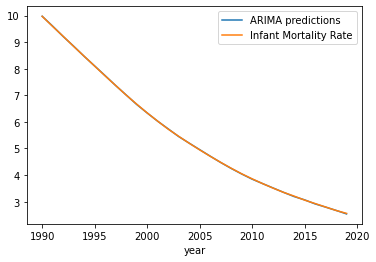

In [12]:
start=len(train)
end=len(train)+len(test)-1
pred=model1.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['Infant Mortality Rate'].plot(legend=True)

In [14]:
from sklearn.metrics import mean_squared_error,  mean_absolute_error

In [15]:
pred

year
1990    9.973697
1991    9.602319
1992    9.212587
1993    8.847560
1994    8.466385
1995    8.104291
1996    7.739845
1997    7.369037
1998    7.014644
1999    6.657925
2000    6.337363
2001    6.027901
2002    5.740319
2003    5.451098
2004    5.203139
2005    4.958377
2006    4.714002
2007    4.476093
2008    4.251982
2009    4.043725
2010    3.847866
2011    3.680204
2012    3.515495
2013    3.350954
2014    3.192861
2015    3.069003
2016    2.917053
2017    2.796573
2018    2.671889
2019    2.539718
Name: ARIMA predictions, dtype: float64

In [16]:
dff['Infant Mortality Rate forecast']=pred

In [17]:
dff.tail()

,co2,lifeexpectancy,Infant Mortality Rate,Population Growth Rate,Fertility Rate,GDPpercapita,Infant Mortality Rate forecast
year,,,,,,,
2015,0.459,71.514,3.06,1.091300,2.120,1248.453398,3.069003
2016,0.467,71.785,2.93,1.070244,2.090,1401.620628,2.917053
2017,0.493,72.052,2.80,1.050045,2.062,1563.913699,2.796573
2018,0.513,72.320,2.67,1.042001,2.036,1698.350394,2.671889
2019,NaN,72.591,2.56,NaN,NaN,1855.739824,2.539718


In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing, Holt

In [19]:
holt=Holt(dff['Infant Mortality Rate'],exponential=True).fit()

In [20]:
holt_pred = holt.predict(start=start, end=end)

<AxesSubplot:xlabel='year'>

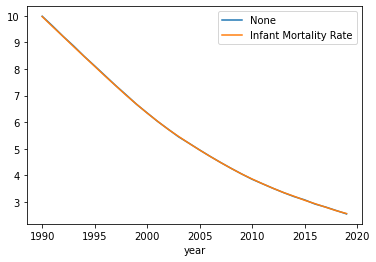

In [21]:
holt_pred.plot(legend=True)
test['Infant Mortality Rate'].plot(legend=True)

In [22]:
holt_pred

year
1990    9.982782
1991    9.613240
1992    9.224483
1993    8.864275
1994    8.475662
1995    8.115486
1996    7.746163
1997    7.376901
1998    7.026766
1999    6.667585
2000    6.346491
2001    6.026327
2002    5.735158
2003    5.444925
2004    5.202723
2005    4.952381
2006    4.712019
2007    4.481636
2008    4.261231
2009    4.050804
2010    3.850352
2011    3.678914
2012    3.508394
2013    3.347853
2014    3.197293
2015    3.075851
2016    2.917009
2017    2.805523
2018    2.675768
2019    2.546036
dtype: float64

In [23]:
dff['holt forecast']=holt_pred

In [24]:
dff.tail()

,co2,lifeexpectancy,Infant Mortality Rate,Population Growth Rate,Fertility Rate,GDPpercapita,Infant Mortality Rate forecast,holt forecast
year,,,,,,,,
2015,0.459,71.514,3.06,1.091300,2.120,1248.453398,3.069003,3.075851
2016,0.467,71.785,2.93,1.070244,2.090,1401.620628,2.917053,2.917009
2017,0.493,72.052,2.80,1.050045,2.062,1563.913699,2.796573,2.805523
2018,0.513,72.320,2.67,1.042001,2.036,1698.350394,2.671889,2.675768
2019,NaN,72.591,2.56,NaN,NaN,1855.739824,2.539718,2.546036


In [25]:
dff.to_excel('save2_file.xlsx')